In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the Life Expectancy data 
life_expectancy_data = pd.read_csv('./Resources/Life_Expectancy_UNData.csv', low_memory=False)

print("\nLife Expectancy Data")
life_expectancy_data.info()



Life Expectancy Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 0 to 20595
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           20596 non-null  int64  
 1   Variant                                                                                         20596 non-null  object 
 2   Region, subregion, country or area *                                                            20596 non-null  object 
 3   Notes                                                                                           5475 non-null   object 
 4   Location code                                                                                   20596 non-null  in

In [23]:
# Filter data for the years of interest
years_of_interest = [1950, 1975, 2000, 2021]
filtered_data = life_expectancy_data[life_expectancy_data['Year'].isin(years_of_interest)]

# Display the filtered data to verify
print("\nFiltered Data for Years of Interest")
filtered_data 



Filtered Data for Years of Interest


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
25,26,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,401,332,143,162,124,251,288,212,0,0
50,51,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,290,220,100,119,81,183,218,145,0,0
71,72,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,233,162,82,99,64,161,195,125,0,0
73,74,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,682,640,322,336,309,462,485,440,- 5,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20523,20524,Estimates,Tuvalu,NaN,798,TUV,TV,798.0,Country/Area,957,...,402,237,173,217,121,309,383,216,- 0,-1.3
20524,20525,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,667,642,375,371,381,562,577,549,- 0,-4.2
20549,20550,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,478,431,216,225,211,385,411,358,- 0,-22.1
20574,20575,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,130,133,43,40,45,113,116,109,- 0,-5.2


In [24]:
# Convert relevant columns to numeric
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype(int)
filtered_data.loc[:, 'Male Life Expectancy at Birth (years)'] = pd.to_numeric(filtered_data['Male Life Expectancy at Birth (years)'], errors='coerce')
filtered_data.loc[:, 'Female Life Expectancy at Birth (years)'] = pd.to_numeric(filtered_data['Female Life Expectancy at Birth (years)'], errors='coerce')

# Filter the necessary columns for analysis
filtered_data = filtered_data[['Region, subregion, country or area *', 'Year', 'Male Life Expectancy at Birth (years)', 'Female Life Expectancy at Birth (years)']]

# Group by Country and Year to find changes in life expectancy
grouped_data = filtered_data.groupby(['Region, subregion, country or area *', 'Year']).mean().unstack()

# Calculate changes in life expectancy
grouped_data['Change in Male Life Expectancy'] = grouped_data['Male Life Expectancy at Birth (years)'][2021] - grouped_data['Male Life Expectancy at Birth (years)'][1950]
grouped_data['Change in Female Life Expectancy'] = grouped_data['Female Life Expectancy at Birth (years)'][2021] - grouped_data['Female Life Expectancy at Birth (years)'][1950]
grouped_data


Male Life Expectancy at Birth (years)  \
Year                                                                1950.0   
Region, subregion, country or area *                                         
AFRICA                                                                36.4   
ASIA                                                                  40.6   
Afghanistan                                                           27.1   
Albania                                                               41.3   
Algeria                                                               41.7   
...                                                                    ...   
Western Europe                                                        64.3   
Western Sahara                                                        33.4   
Yemen                                                                 29.5   
Zambia                                                                44.0   
Zimbabwe                                                              47.6   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
AFRICA                                 45.4   51.8   59.7   
ASIA                                   55.3   65.7   70.1   
Afghanistan                            39.4   53.8   58.9   
Albania                                66.1   72.6   74.1   
Algeria                                46.3   69.1   74.9   
...                                     ...    ...    ...   
Western Europe                         68.8   75.1   78.9   
Western Sahara                         31.1   61.1   69.1   
Yemen                                  43.0   60.6   60.6   
Zambia                                 52.9   43.9   58.5   
Zimbabwe                               55.6   42.9   56.2   

                                     Female Life Expectancy at Birth (years)  \
Year                                                                  1950.0   
Region, subregion, country or area *                                           
AFRICA                                                                  38.8   
ASIA                                                                    43.6   
Afghanistan                                                             28.4   
Albania                                                                 48.7   
Algeria                                                                 43.2   
...                                                                      ...   
Western Europe                                                          69.5   
Western Sahara                                                          36.4   
Yemen                                                                   34.0   
Zambia                                                                  46.3   
Zimbabwe                                                                51.8   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
AFRICA                                 48.5   54.9   63.7   
ASIA                                   58.1   69.6   75.1   
Afghanistan                            40.9   56.9   65.3   
Albania                                70.6   78.4   79.2   
Algeria                                47.7   71.9   78.0   
...                                     ...    ...    ...   
Western Europe                         75.6   81.5   84.1   
Western Sahara                         46.2   64.5   72.9   
Yemen                                  47.6   64.6   67.1   
Zambia                                 55.6   46.4   63.9   
Zimbabwe                               59.5   46.5   62.0   

                                     Change in Male Life Expectancy  \
Year                                      

In [25]:
# Sort by changes in life expectancy and select top 5 and bottom 5
top_changes = grouped_data.sort_values(by='Change in Male Life Expectancy', ascending=False).head(5)
bottom_changes = grouped_data.sort_values(by='Change in Male Life Expectancy', ascending=True).head(5)

# Display the top 5 and bottom 5 changes in life expectancy
print("\nTop 5 Countries - Changes in Male and Female Life Expectancy:")
display(top_changes.head())

print("\nBottom 5 Countries - Changes in Male and Female Life Expectancy:")
display(bottom_changes.head())



Top 5 Countries - Changes in Male and Female Life Expectancy:


Male Life Expectancy at Birth (years)  \
Year                                                                1950.0   
Region, subregion, country or area *                                         
Republic of Korea                                                     16.8   
Dem. People's Republic of Korea                                       11.1   
Oman                                                                  28.0   
Maldives                                                              36.7   
Bhutan                                                                29.2   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
Republic of Korea                      60.4   72.5   80.4   
Dem. People's Republic of Korea        60.5   57.0   70.8   
Oman                                   50.9   71.5   71.0   
Maldives                               50.3   70.2   79.1   
Bhutan                                 43.2   60.7   70.1   

                                     Female Life Expectancy at Birth (years)  \
Year                                                                  1950.0   
Region, subregion, country or area *                                           
Republic of Korea                                                       33.6   
Dem. People's Republic of Korea                                         20.6   
Oman                                                                    31.5   
Maldives                                                                38.3   
Bhutan                                                                  31.0   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
Republic of Korea                      69.2   80.2   86.8   
Dem. People's Republic of Korea        65.9   63.8   75.7   
Oman                                   55.9   76.5   74.7   
Maldives                               50.8   71.8   81.0   
Bhutan                                 45.1   63.6   73.8   

                                     Change in Male Life Expectancy  \
Year                                                                  
Region, subregion, country or area *                                  
Republic of Korea                                              63.6   
Dem. People's Republic of Korea                                59.7   
Oman                                                           43.0   
Maldives                                                       42.4   
Bhutan                                                         40.9   

                                     Change in Female Life Expectancy  
Year                                                                   
Region, subregion, country or area *                                   
Republic of Korea                                                53.2  
Dem. People's Republic of Korea                                  55.1  
Oman                                                             43.2  
Maldives                                                         42.7  
Bhutan                                                           42.8


Bottom 5 Countries - Changes in Male and Female Life Expectancy:


Male Life Expectancy at Birth (years)  \
Year                                                                1950.0   
Region, subregion, country or area *                                         
Nauru                                                                 56.0   
Latvia                                                                64.6   
Lithuania                                                             62.9   
Ukraine                                                               58.1   
Zimbabwe                                                              47.6   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
Nauru                                  59.5   55.9   60.3   
Latvia                                 63.9   64.6   69.2   
Lithuania                              66.2   66.6   68.8   
Ukraine                                64.7   62.3   66.5   
Zimbabwe                               55.6   42.9   56.2   

                                     Female Life Expectancy at Birth (years)  \
Year                                                                  1950.0   
Region, subregion, country or area *                                           
Nauru                                                                   57.4   
Latvia                                                                  71.7   
Lithuania                                                               68.8   
Ukraine                                                                 65.5   
Zimbabwe                                                                51.8   

                                                           \
Year                                 1975.0 2000.0 2021.0   
Region, subregion, country or area *                        
Nauru                                  64.2   62.8   67.3   
Latvia                                 74.0   75.8   77.8   
Lithuania                              75.4   77.4   78.8   
Ukraine                                73.6   73.5   76.7   
Zimbabwe                               59.5   46.5   62.0   

                                     Change in Male Life Expectancy  \
Year                                                                  
Region, subregion, country or area *                                  
Nauru                                                           4.3   
Latvia                                                          4.6   
Lithuania                                                       5.9   
Ukraine                                                         8.4   
Zimbabwe                                                        8.6   

                                     Change in Female Life Expectancy  
Year                                                                   
Region, subregion, country or area *                                   
Nauru                                                             9.9  
Latvia                                                            6.1  
Lithuania                                                        10.0  
Ukraine                                                          11.2  
Zimbabwe                                                         10.2

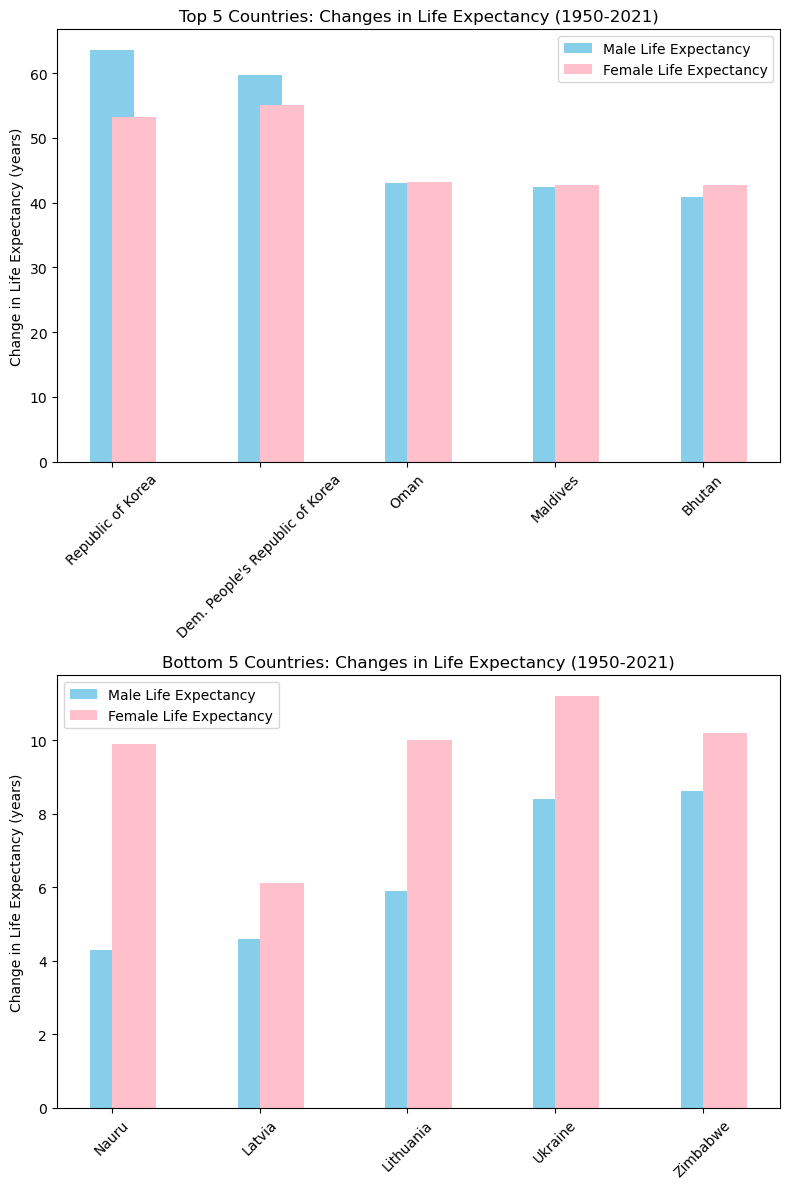

In [26]:
# Plotting the grouped bar chart with reduced bar width
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Function to plot grouped bars with reduced width
def plot_grouped_bars(ax, data, title):
    countries = data.index.get_level_values('Region, subregion, country or area *')
    bars1 = ax.bar(countries, data['Change in Male Life Expectancy'], color='skyblue', width=0.3, align='center', label='Male Life Expectancy')
    bars2 = ax.bar(countries, data['Change in Female Life Expectancy'], color='pink', width=0.3, align='edge', label='Female Life Expectancy')
    ax.set_title(title)
    ax.set_ylabel('Change in Life Expectancy (years)')
    ax.legend()

# Plot top 5 highest changes in life expectancy
plot_grouped_bars(ax1, top_changes, 'Top 5 Countries: Changes in Life Expectancy (1950-2021)')

# Plot bottom 5 lowest changes in life expectancy
plot_grouped_bars(ax2, bottom_changes, 'Bottom 5 Countries: Changes in Life Expectancy (1950-2021)')

# Rotate x-axis labels for better readability
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


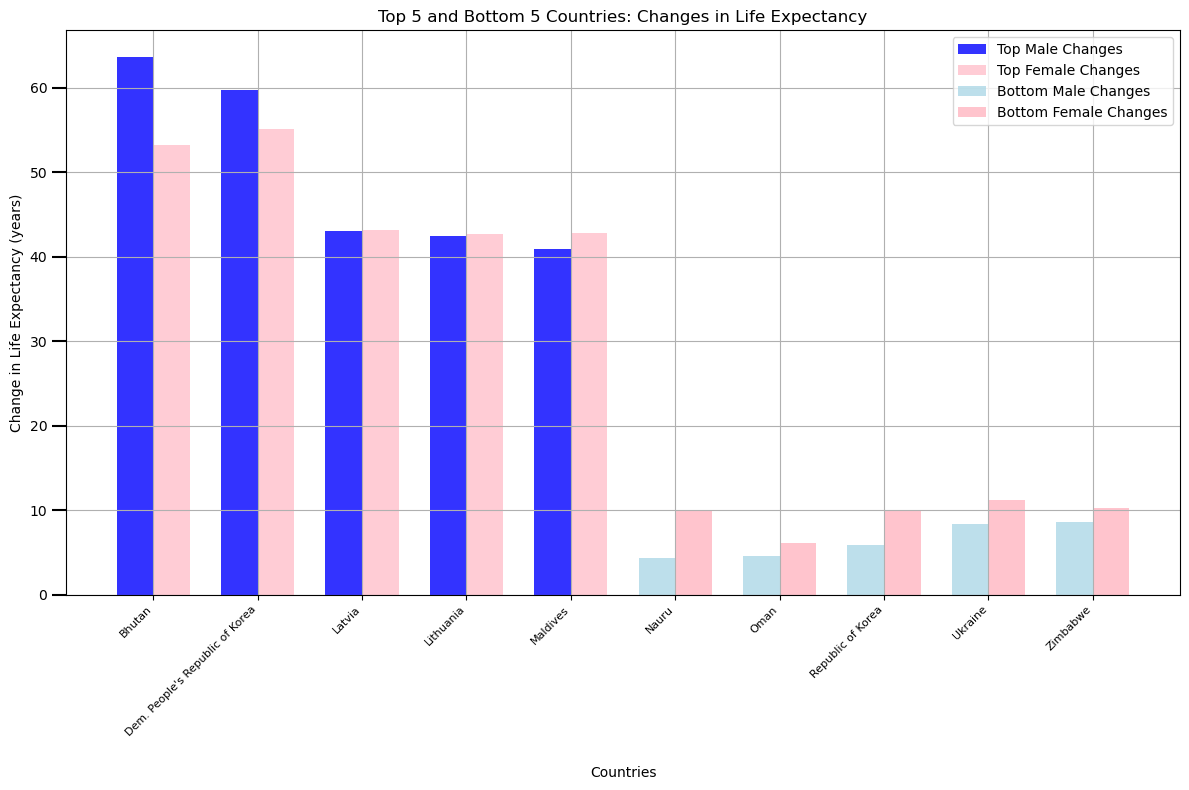

In [77]:
# Set the width of the bars
bar_width = 0.35
opacity = 0.8

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Combine indices from both datasets for x-axis ticks and labels
combined_index = top_changes.index.union(bottom_changes.index)

# Plotting grouped bars for top changes
x1 = np.arange(len(top_changes))
rects1 = ax.bar(x1 - bar_width/2, top_changes['Change in Male Life Expectancy'], bar_width, alpha=opacity, color='blue', label='Top Male Changes')
rects2 = ax.bar(x1 + bar_width/2, top_changes['Change in Female Life Expectancy'], bar_width, alpha=opacity, color='pink', label='Top Female Changes')

# Plotting grouped bars for bottom changes
x2 = np.arange(len(top_changes), len(top_changes) + len(bottom_changes))
rects3 = ax.bar(x2 - bar_width/2, bottom_changes['Change in Male Life Expectancy'], bar_width, alpha=opacity, color='lightblue', label='Bottom Male Changes')
rects4 = ax.bar(x2 + bar_width/2, bottom_changes['Change in Female Life Expectancy'], bar_width, alpha=opacity, color='lightpink', label='Bottom Female Changes')

# Adding labels, title, and legend
ax.set_xlabel('Countries', labelpad=20) 
ax.set_ylabel('Change in Life Expectancy (years)')
ax.set_title('Top 5 and Bottom 5 Countries: Changes in Life Expectancy')

# Adjusting x-axis ticks and labels
ax.set_xticks(np.arange(len(combined_index)))
ax.set_xticklabels(combined_index, rotation=45, ha='right', fontsize=8)  

# Adjusting y-axis ticks for better spacing
ax.yaxis.set_tick_params(which='major', width=1.5, length=10)

# Adding grid
ax.grid(True)

# Adding legend
ax.legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

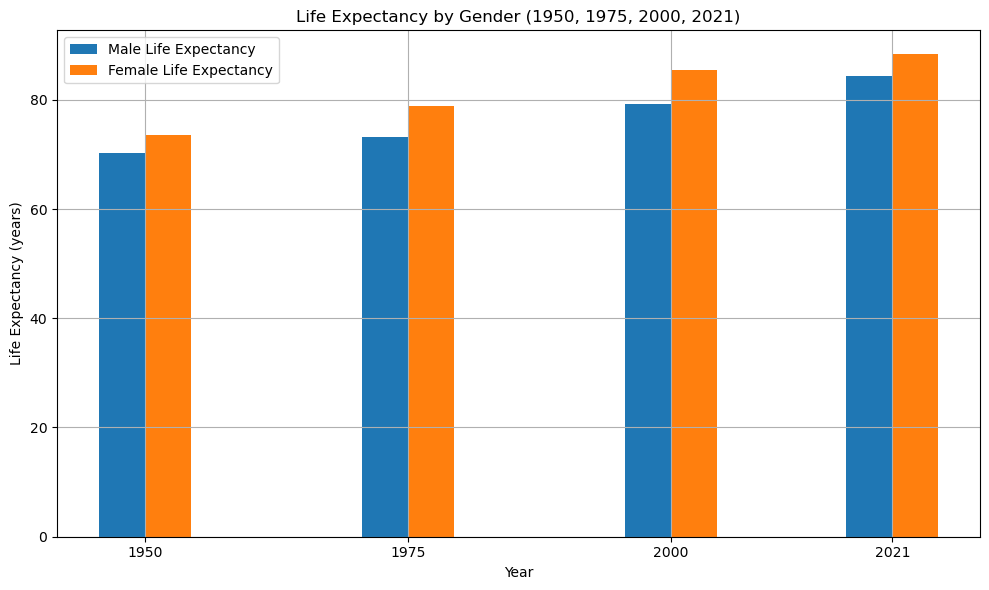

In [27]:
# Assuming filtered_data contains your filtered dataset
years_of_interest = [1950, 1975, 2000, 2021]

# Data preparation (example data)
years = filtered_data['Year']
male_life_expectancy = filtered_data['Male Life Expectancy at Birth (years)']
female_life_expectancy = filtered_data['Female Life Expectancy at Birth (years)']

# Set the width of the bars
bar_width = 4.35

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_male = ax.bar(years - bar_width/2, male_life_expectancy, bar_width, label='Male Life Expectancy')
bar_female = ax.bar(years + bar_width/2, female_life_expectancy, bar_width, label='Female Life Expectancy')

# Adding labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy (years)')
ax.set_title('Life Expectancy by Gender (1950, 1975, 2000, 2021)')
ax.set_xticks(years_of_interest)
ax.legend()

# Adding grid
ax.grid(True)

# Showing the plot
plt.tight_layout()
plt.show()